In [4]:
from re import X

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

n = 150
p = 6

mean = np.zeros(p)
cov = np.diag([1, 1, 1, 30, 30, 30])
data = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

print(data.shape)

(150, 6)


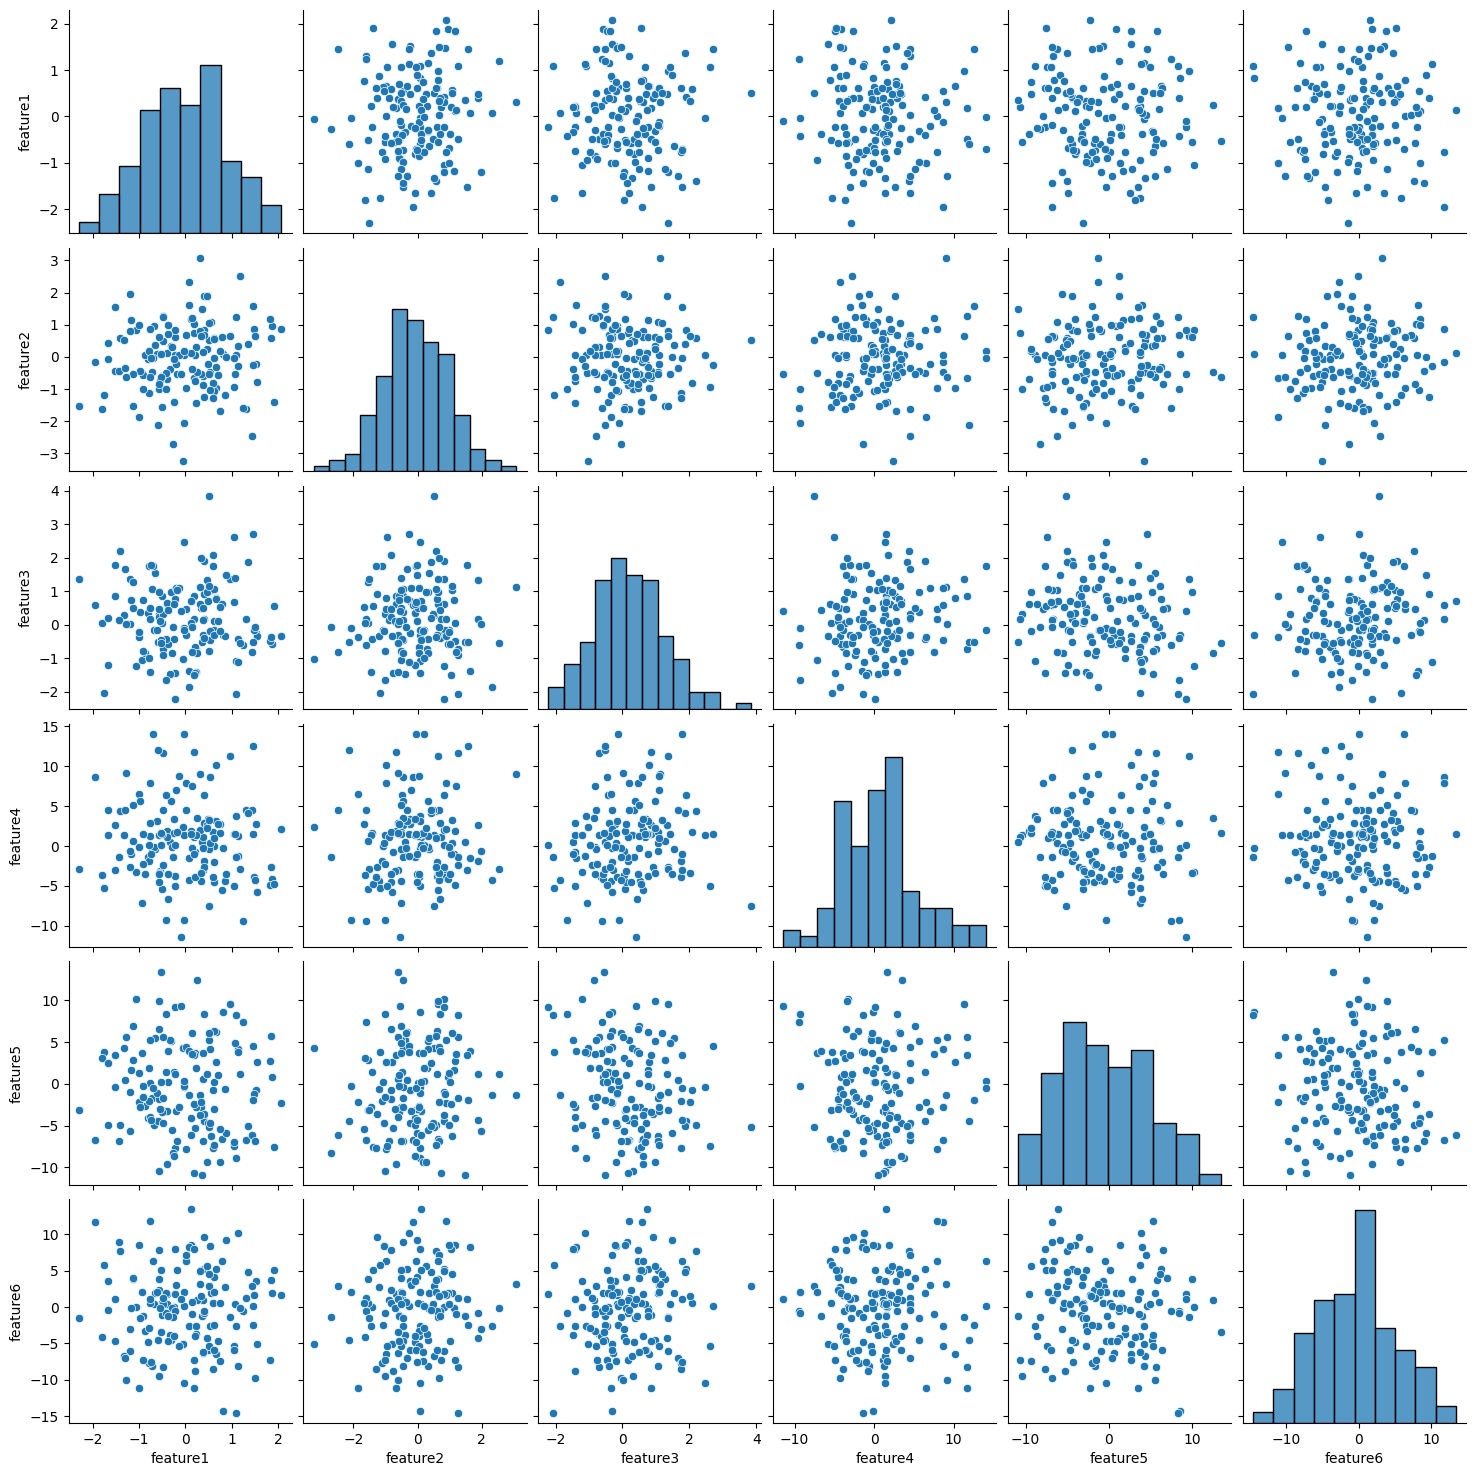

In [10]:
import pandas as pd

df = pd.DataFrame(data, columns=[f"feature{i+1}" for i in range(p)])
sns.pairplot(df)

In [42]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_cov = PCA(n_components=3)
X_cov = pca_cov.fit_transform(data)


X_standardize = StandardScaler().fit_transform(data)
pca_corr = PCA(n_components=3)
X_corr = pca_corr.fit_transform(X_standardize)

print(f"Total Variance retain using 3 Components using Variance Based PCA: {np.sum(pca_cov.explained_variance_ratio_)}")
print(f"Total Variance retain using 3 Components using Correlation Based PCA: {np.sum(pca_corr.explained_variance_ratio_)}")


Total Variance retain using 3 Components using Variance Based PCA: 0.9661761541732778
Total Variance retain using 3 Components using Correlation Based PCA: 0.5821002047841588


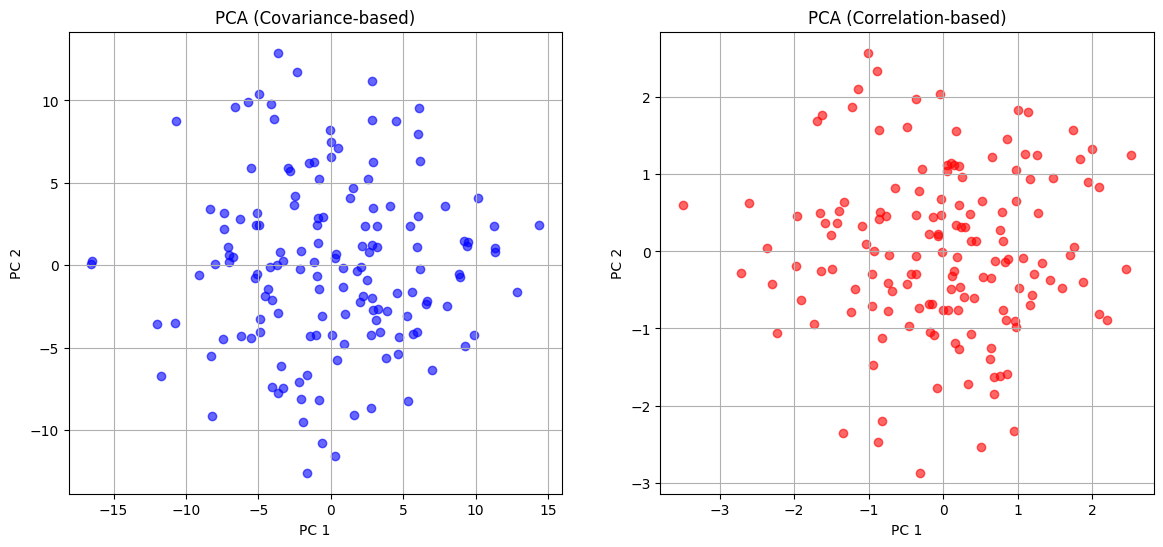

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA based on covariance
axes[0].scatter(X_cov[:, 0], X_cov[:, 1], c='blue', alpha=0.6)
axes[0].set_xlabel("PC 1")
axes[0].set_ylabel("PC 2")
axes[0].set_title("PCA (Covariance-based)")
axes[0].grid(True)

# PCA based on correlation (Standardized data)
axes[1].scatter(X_corr[:, 0], X_corr[:, 1], c='red', alpha=0.6)
axes[1].set_xlabel("PC 1")
axes[1].set_ylabel("PC 2")
axes[1].set_title("PCA (Correlation-based)")
axes[1].grid(True)

plt.show()

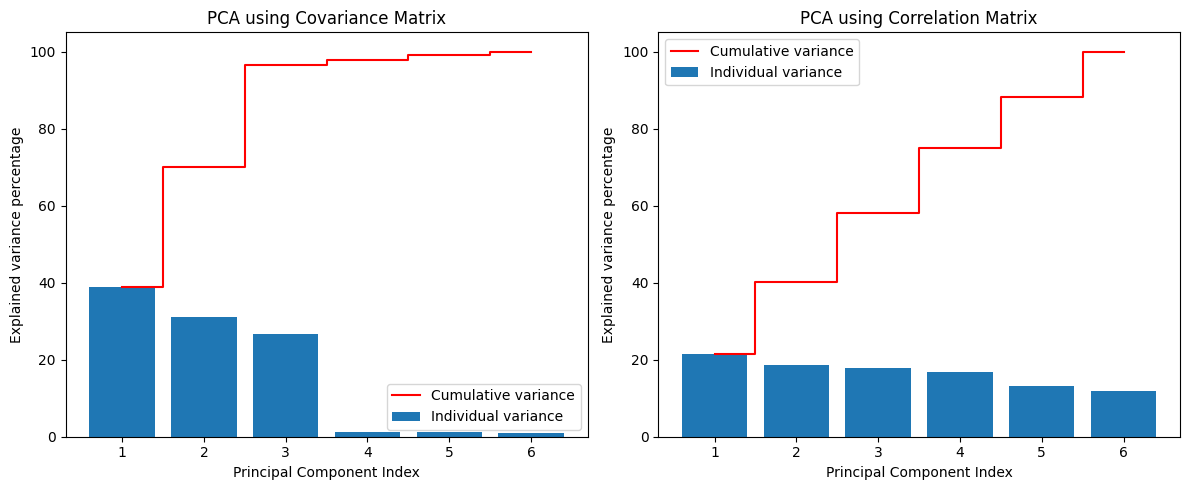

In [36]:
pca_cov = PCA(n_components=p)
pca_cov.fit(data)
pca_cov_var = pca_cov.explained_variance_ratio_ * 100
pca_cov_cum_var = np.cumsum(pca_cov_var)

_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(range(1, p+1), pca_cov_var, align='center', label='Individual variance')
axes[0].step(range(1, p+1), pca_cov_cum_var, where='mid', label='Cumulative variance', color='red')
axes[0].set_ylabel('Explained variance percentage')
axes[0].set_xlabel('Principal Component Index')
axes[0].set_xticks(range(1, p + 1))
axes[0].legend(loc='best')
axes[0].set_title('PCA using Covariance Matrix')

X_standardize = StandardScaler().fit_transform(data)
pca_corr = PCA(n_components=p)
pca_corr.fit(X_standardize)

pca_cov_var = pca_corr.explained_variance_ratio_ * 100
pca_cov_cum_var = np.cumsum(pca_cov_var)

axes[1].bar(range(1, p+1), pca_cov_var, align='center', label='Individual variance')

axes[1].step(range(1, p+1), pca_cov_cum_var, where='mid', label='Cumulative variance', color='red')
axes[1].set_ylabel('Explained variance percentage')
axes[1].set_xlabel('Principal Component Index')
axes[1].set_xticks(range(1, p + 1))
axes[1].legend(loc='best')
axes[1].set_title('PCA using Correlation Matrix')

plt.tight_layout()
plt.show()

In [50]:
from mpl_toolkits.mplot3d import Axes3D

_ = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_corr[:, 0], X_corr[:, 1], X_corr[:, 2], c='blue', alpha=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection (Covariance-Based)")
plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'cmap'

<Figure size 1000x600 with 0 Axes>

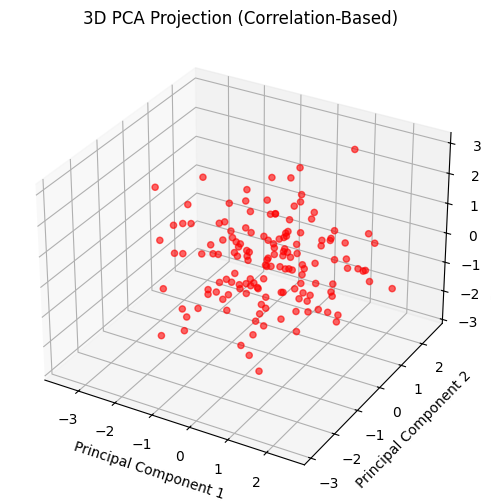

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_corr[:, 0], X_corr[:, 1], X_corr[:, 2], c='red', alpha=0.6)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection (Correlation-Based)")

plt.show()

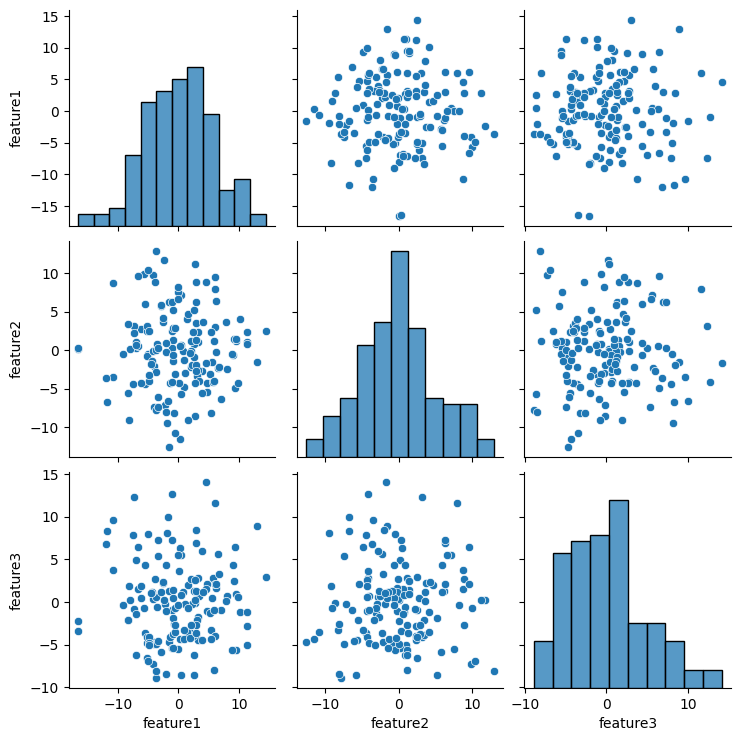

In [49]:
df = pd.DataFrame(X_cov, columns=[f"feature{i+1}" for i in range(3)])
sns.pairplot(df)

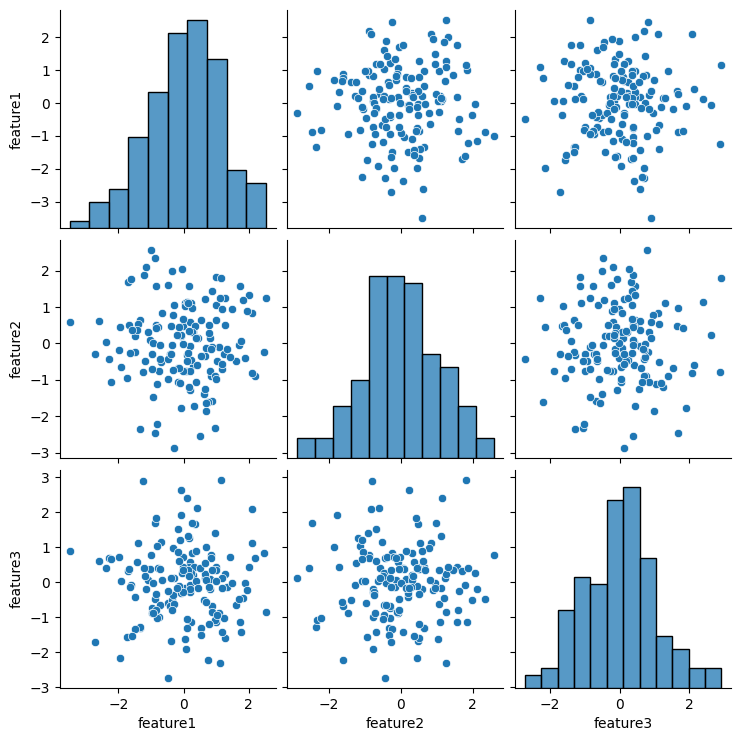

In [48]:
df = pd.DataFrame(X_corr, columns=[f"feature{i+1}" for i in range(3)])
sns.pairplot(df)